# Assignment 9- Practicing Functions

This assignment deals with more functions. Specifically, the focus is on creating functions that allow the user to clean and manipulate data and create graphs of multiple variables at once.

### 1. Input dataset and outputs the number of missing values in each column

In [1]:
number_missing = function(data)
{
  colSums(is.na(data))
}

setwd("~/Data Analysis Practice Data Sets/Titanic Practice")
getwd()
titanic <- read.csv("train.csv")
titanic$PassengerId = NULL
titanic$Name = NULL
titanic$Ticket = NULL
titanic$Cabin = NULL
titanic$Survived = factor(titanic$Survived)
titanic$Pclass = factor(titanic$Pclass)
number_missing(titanic)

[1] "C:/Users/student/Documents/Data Analysis Practice Data Sets/Titanic Practice"

Survived   Pclass      Sex      Age    SibSp    Parch     Fare Embarked 
       0        0        0      177        0        0        0        0

### 2. Inputs a dataset and outputs the names of variables with missing values

In [2]:
name_missing = function(data)
{
  names(which(colSums(is.na(data)) > 0))
}

name_missing(titanic)

[1] "Age"

### 3. Write a function that inputs a dataset and outputs (1) the names of variables with missing values and (2) the corresponding number of missing values in each variables

In [3]:
name_num_miss = function(data)
{
  library(dplyr)
  missing_data <- data.frame("variable" = colnames(data),
                            "missing_values" = colSums(is.na(data)))
  missing_data <- filter(missing_data, missing_values != 0)
  missing_data
}

name_num_miss(titanic)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



variable,missing_values
Age,177


### 4. Write a function that inputs a dataset and output a dataset replaces missing values of numeric variables with the mean and missing values of categorical variables are replaced by the most frequent category in the variables

In [4]:
most_frequent <- function(x){
   unique_x <- unique(x)
   unique_x[which.max(tabulate(match(x, unique_x)))]
}

data_cleaning <- function(data)
{
  for (i in which(sapply(data, is.numeric))){
       data[is.na(data[,i]), i] <- mean(data[,i], na.rm = TRUE)
  } 
  for (i in which(sapply(data, is.factor))){
        data[is.na(data[,i]), i] <- most_frequent(data[,i])
    }
  return(data)
}

m <- data.frame("categorical" = c("Hello", "Hello", "Bye", NA), 
                  "numerical" = c(NA,2,3,4))
m
data_cleaning(m)

categorical,numerical
Hello,NA
Hello,2
Bye,3
NA,4


categorical,numerical
Hello,3
Hello,2
Bye,3
Hello,4


### 5. Write a function that inputs a dataset and outputs (1) sub-dataset containing categorical variables and (2) sub-dataset containing numeric variables

In [5]:
subset_data <- function(data)
{
  num <- sapply(data, is.numeric)
  numeric <- data.frame(data[,num])

  cat <- sapply(data, is.factor)
  categorical <- data.frame(data[,cat])
 
  return(list(numeric,categorical))
}

d <- subset_data(titanic)
head(d[[1]])
head(d[[2]])


Age,SibSp,Parch,Fare
22,1,0,7.2500
38,1,0,71.2833
26,0,0,7.9250
35,1,0,53.1000
35,0,0,8.0500
NA,0,0,8.4583


Survived,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
1,3,female,S
1,1,female,S
0,3,male,S
0,3,male,Q


### 6. Function that inputs a dataset and output density curves of all numeric variables

Warning message:
"Removed 177 rows containing non-finite values (stat_density)."

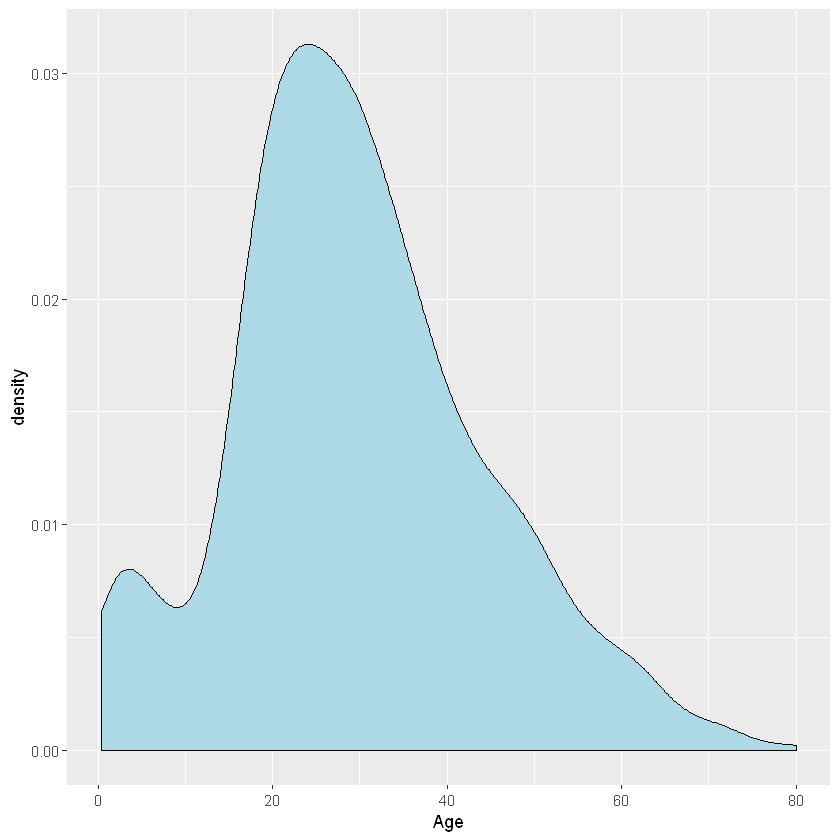

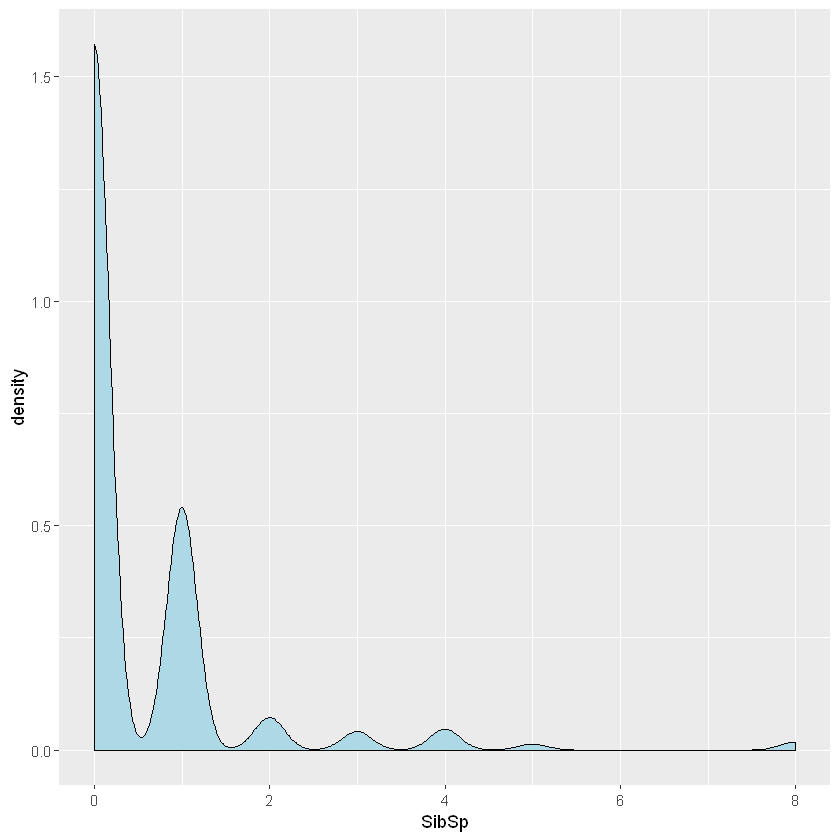

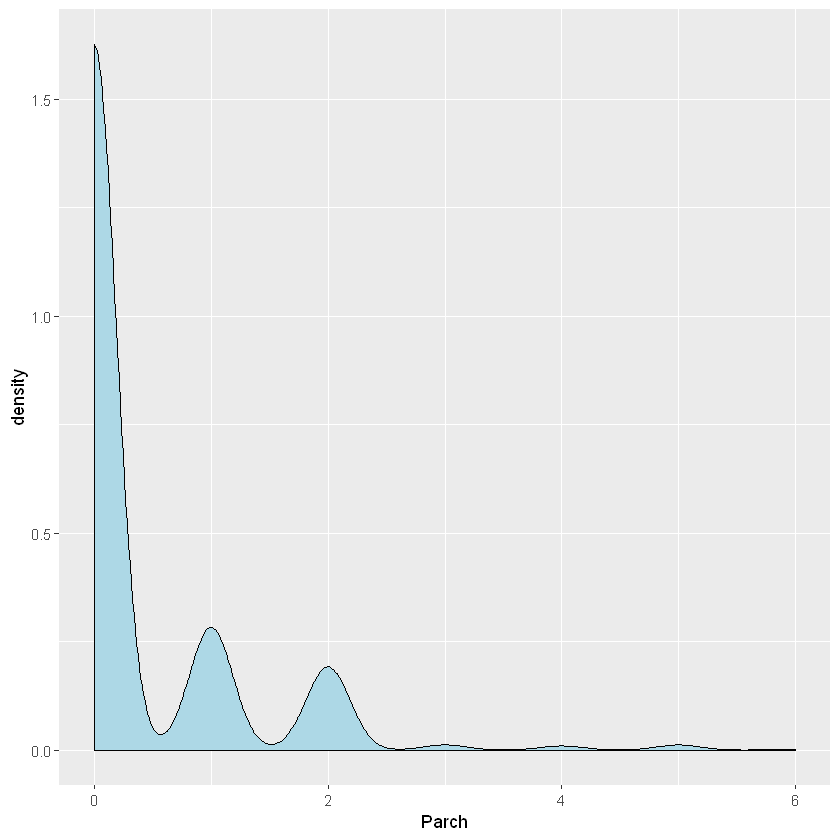

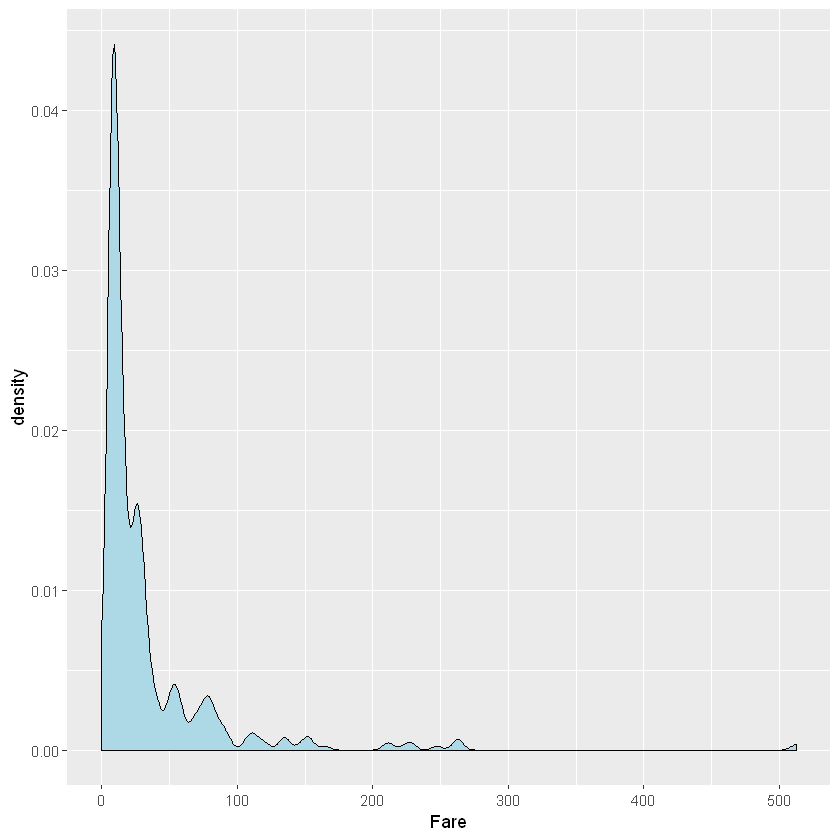

In [6]:
density_curves <- function(data)
{
  library(ggplot2)
  columns <- names(data)
  for (i in 1:ncol(data)){
    if (is.numeric(data[[i]])){
      print(ggplot(data) +
              geom_density(mapping = aes(x=data[,i]), fill = "lightblue") +
              xlab(columns[i]))
    }
  }
}

density_curves(titanic)

### 7. Function that inputs a dataset and output bar charts of categorical variables

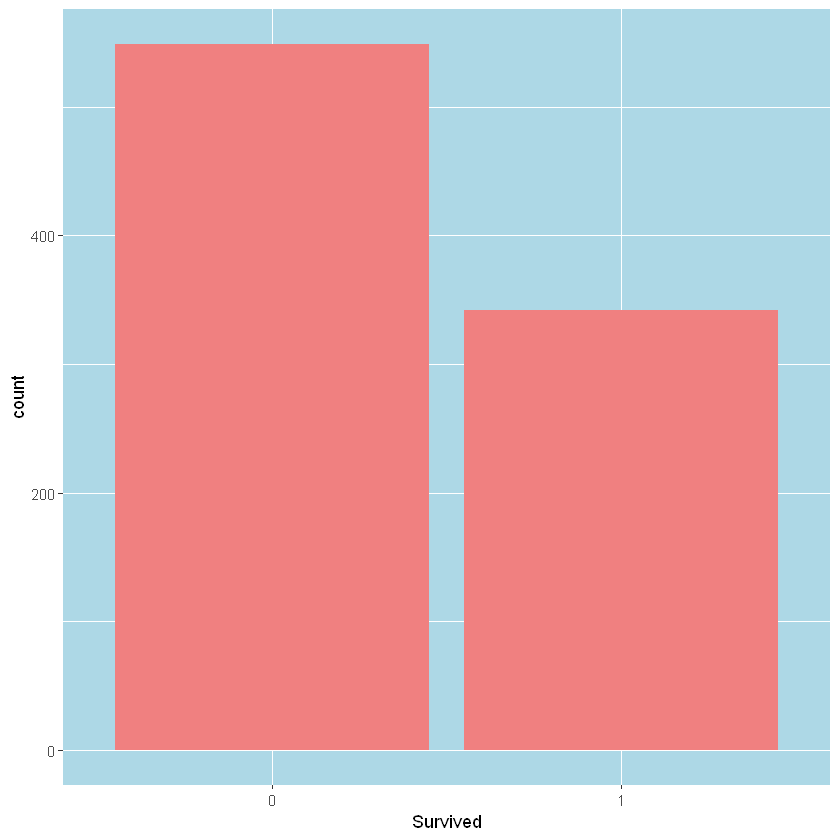

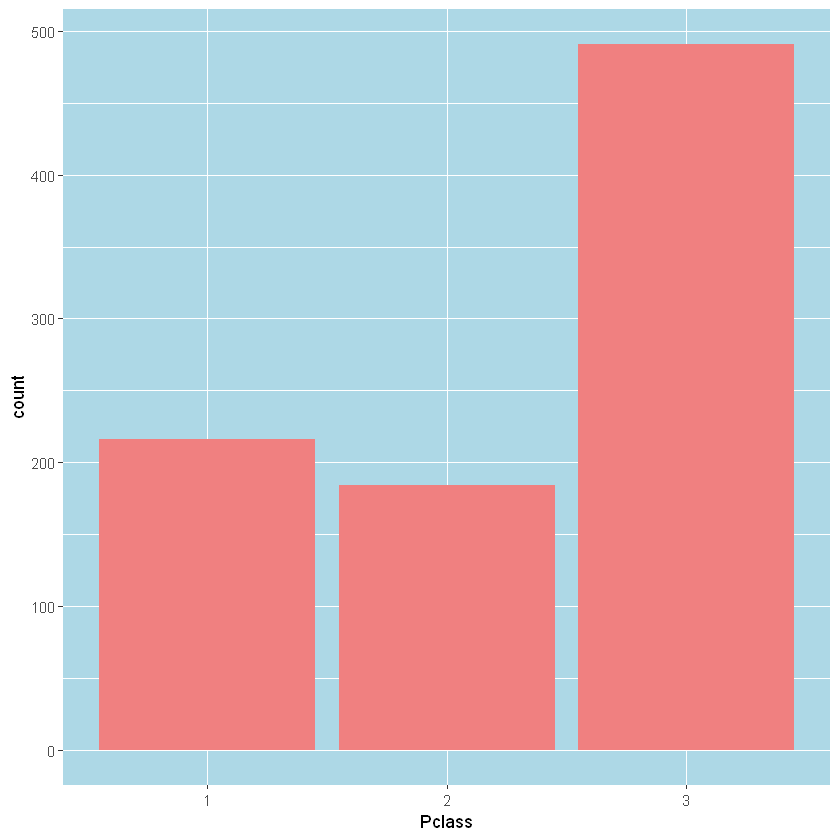

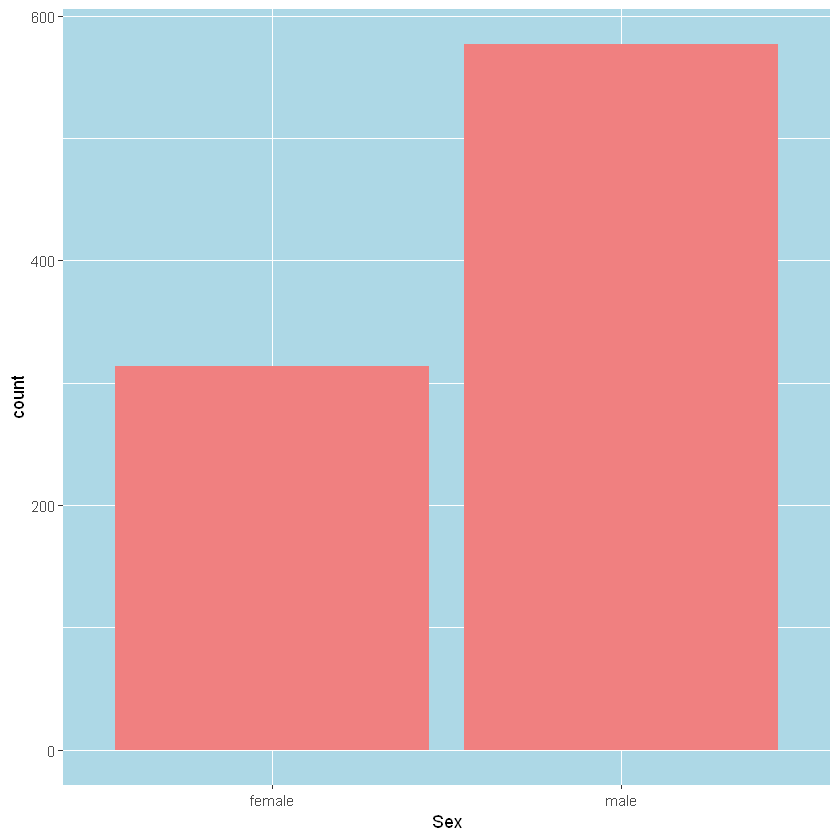

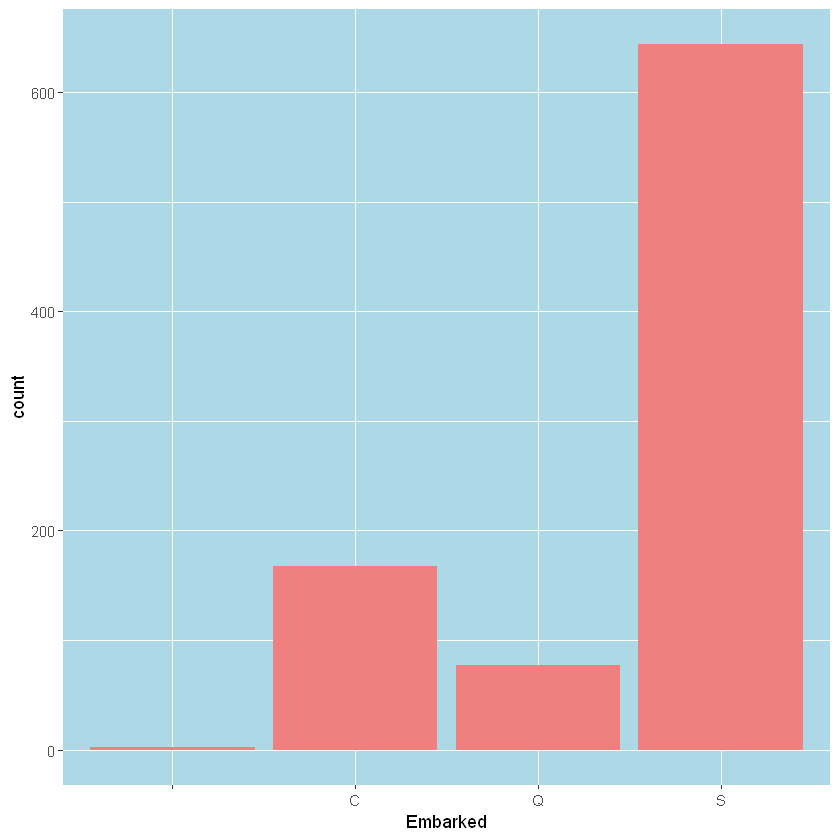

In [7]:
bar_charts <- function(data)
{
  library(ggplot2)
  columns <- names(data)
  for (i in 1:ncol(data)){
    if (is.factor(data[[i]])){
      print(ggplot(data) +
          geom_bar(mapping = aes(x=data[,i]), fill = "lightcoral") +
          xlab(columns[i]) +
          theme(panel.background = element_rect(fill = "light blue")))
    }
  }
}

bar_charts(titanic)

### 8. Write a function that inputs a dataset and two number i, j and outputs bar charts of column i and column j.  If either i or j are not categorical variables, output a message saying so

Warning message in chart_list[s] <- (ggplot(data) + geom_bar(mapping = aes(x = data[, :
"number of items to replace is not a multiple of replacement length"

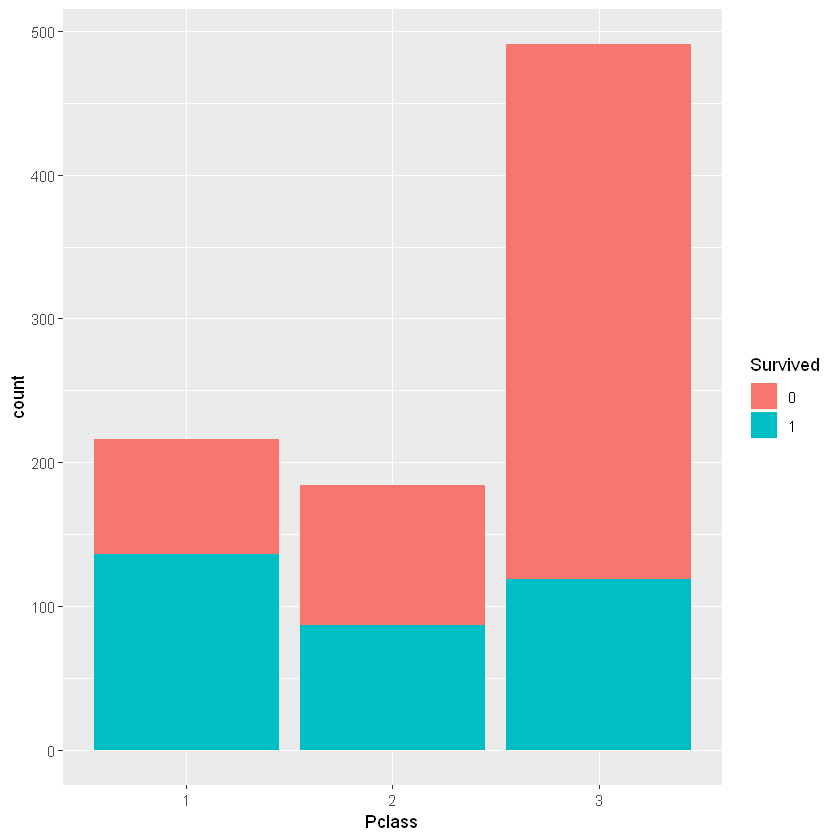

In [8]:
bar_charts2 = function(data, variable1, variable2)
{
  chart_list <- list()
  s = 0
  library(ggplot2)
  if (is.factor(data[,variable1]) & is.factor(data[,variable2])){
    s = s + 1
    chart_list[s] <- (ggplot(data) + 
      geom_bar(mapping = aes(x = data[,variable1], fill=data[,variable2])) +
      xlab(variable1) +
      labs(fill = variable2))
  } else print("At least one of the input variables is not categorical.")
}

p = bar_charts2(titanic, "Pclass", "Survived")
p

### 9.Write a function that inputs a dataset and two number i, j and outputs the scatter plot of column i and column j. If either i or j are not numeric variables, output a message saying so

Warning message:
"Removed 177 rows containing missing values (geom_point)."

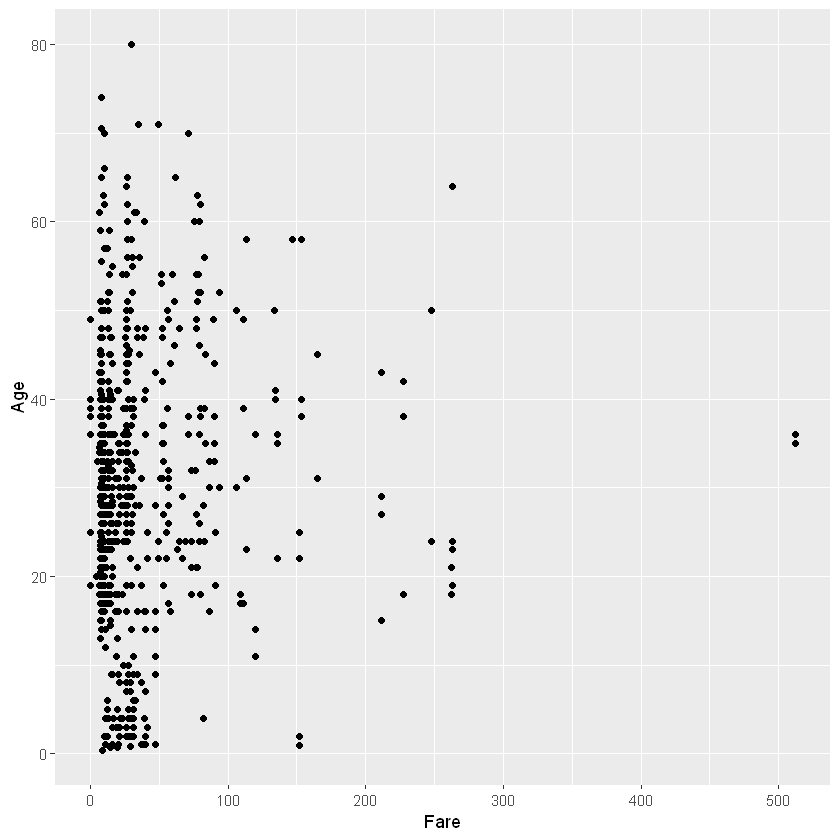

In [9]:
scatter2 = function(data, variable1, variable2)
{
  library(ggplot2)
  if (is.numeric(data[,variable1]) & is.numeric(data[,variable2])){
    print(ggplot(data) + 
      geom_point(mapping = aes(x = data[,variable1], y=data[,variable2])) +
      xlab(variable1) +
      ylab(variable2))
  } else print("At least one of the input variables is not numerical.")
}

scatter2(titanic, "Fare", "Age")

### 10. Write a function that inputs a dataset and two number i, j and output the density curves of column i partitioning on categories of column j. If the two columns are not suitable for the graph, print out the message saying so. 

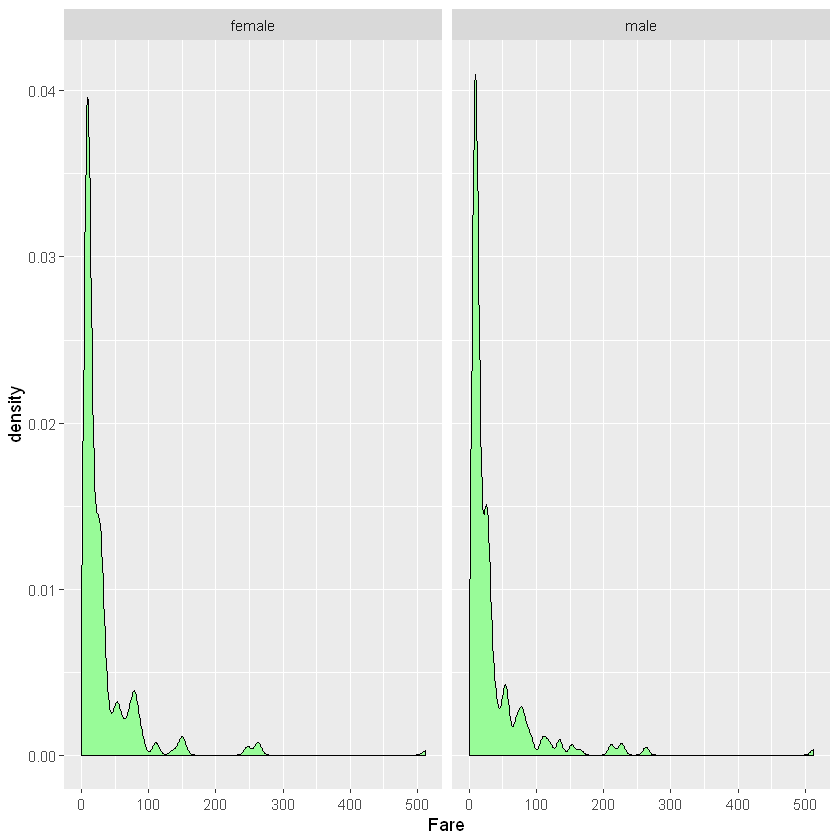

In [10]:
bar_density2 = function(data, variable1, variable2)
{
  library(ggplot2)
  if (is.numeric(data[,variable1]) & is.factor(data[,variable2])){
    print(ggplot(data) + 
      geom_density(mapping = aes(x = data[,variable1]), fill = "palegreen") +
      facet_wrap(~data[,variable2]) +
      xlab(variable1)) 
  } else print("The first input variable must be numeric and the second must be categorical.")
}

bar_density2(titanic, "Fare", "Sex")

### 11. Write a function that inputs a dataset and output all possible bar charts of pair of variables in the dataset.

Warning message in chart_list[s] <- (ggplot(data) + geom_bar(mapping = aes(x = data[, :
"number of items to replace is not a multiple of replacement length"Warning message in chart_list[s] <- (ggplot(data) + geom_bar(mapping = aes(x = data[, :
"number of items to replace is not a multiple of replacement length"Warning message in chart_list[s] <- (ggplot(data) + geom_bar(mapping = aes(x = data[, :
"number of items to replace is not a multiple of replacement length"Warning message in chart_list[s] <- (ggplot(data) + geom_bar(mapping = aes(x = data[, :
"number of items to replace is not a multiple of replacement length"Warning message in chart_list[s] <- (ggplot(data) + geom_bar(mapping = aes(x = data[, :
"number of items to replace is not a multiple of replacement length"Warning message in chart_list[s] <- (ggplot(data) + geom_bar(mapping = aes(x = data[, :
"number of items to replace is not a multiple of replacement length"Warning message in chart_list[s] <- (ggplot(data) + geom_bar(map

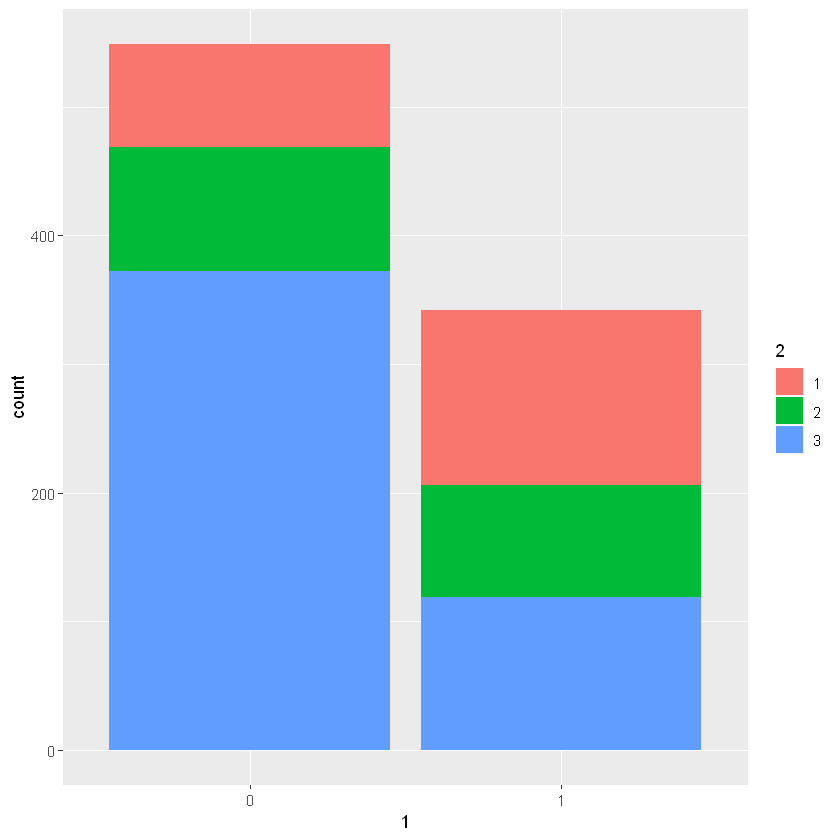

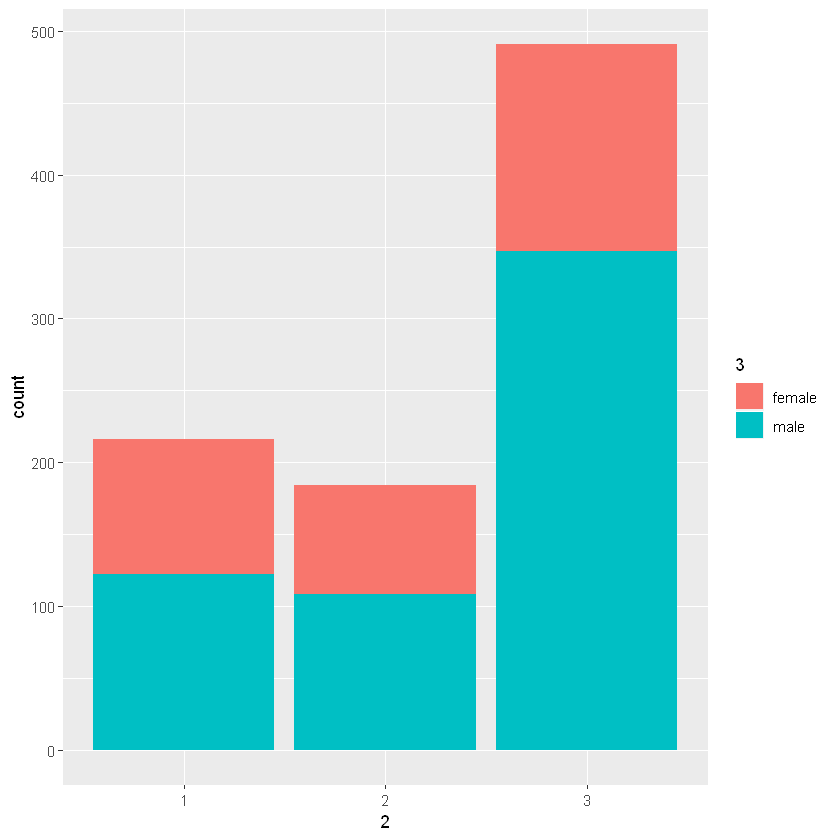

In [13]:
bar_chart_pairs <- function(data)
{
  library(ggplot2)
  chart_list <- list()
  s = 0
  for (i in 1:ncol(data)){
    if(is.factor(data[[i]])){
      for (j in i:length(data)){
        if (is.factor(data[[j]])){
          s = s + 1
          chart_list[[s]] <- bar_charts2(data, i, j)
        }
      }
    }
  }
  return(chart_list)
}

d = bar_chart_pairs(titanic)
d[[2]]
d[[6]]

### 12. Write a function that inputs a dataset and output all possible density curves of variables in the dataset. 

Warning message:
"Removed 177 rows containing non-finite values (stat_density)."

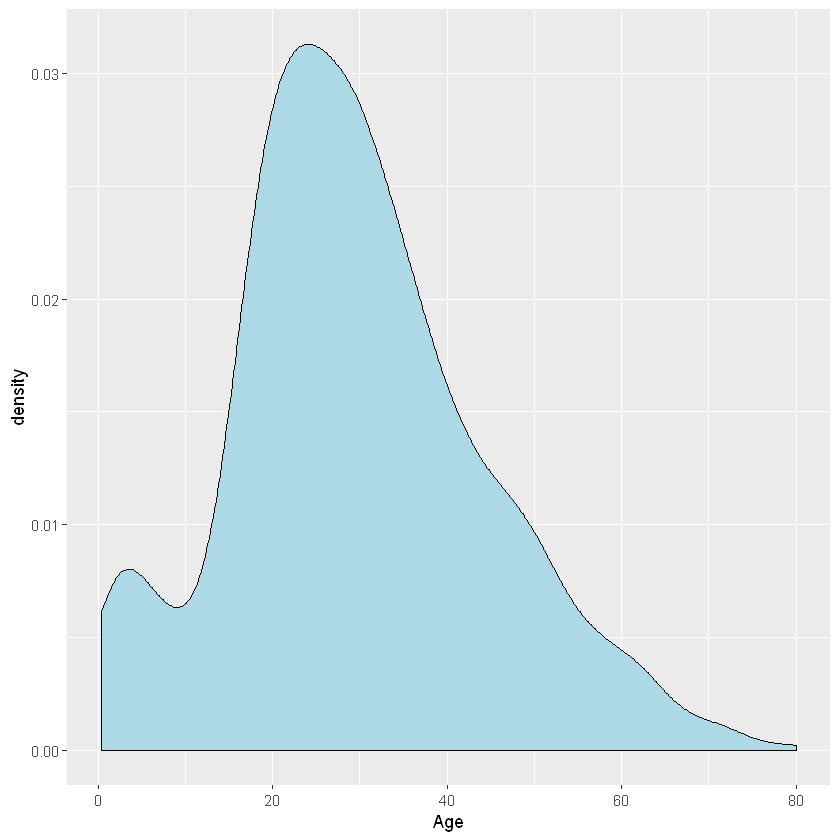

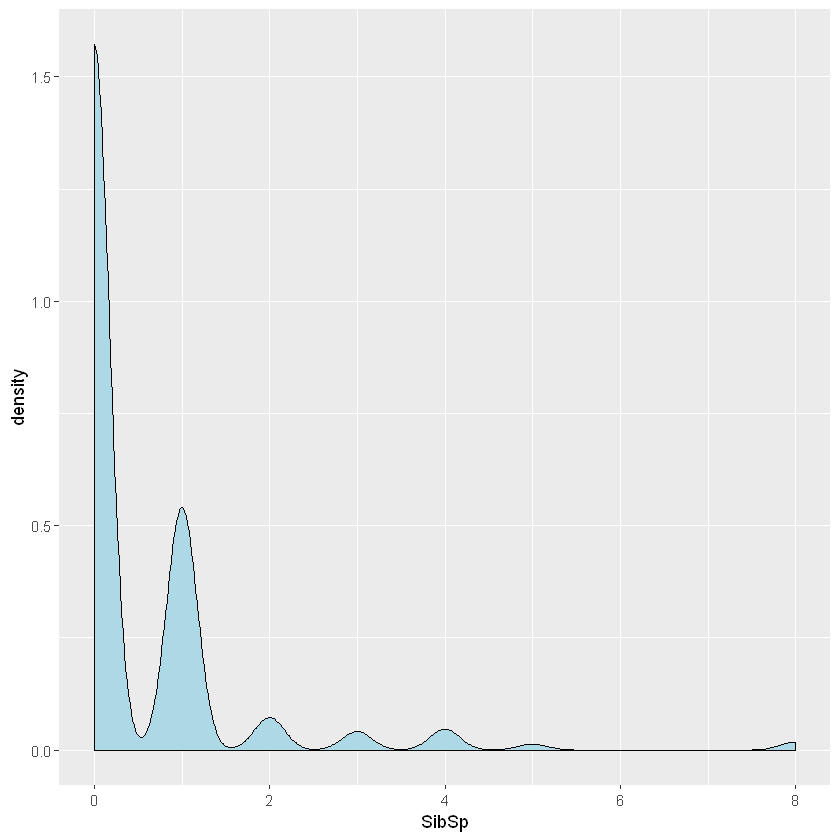

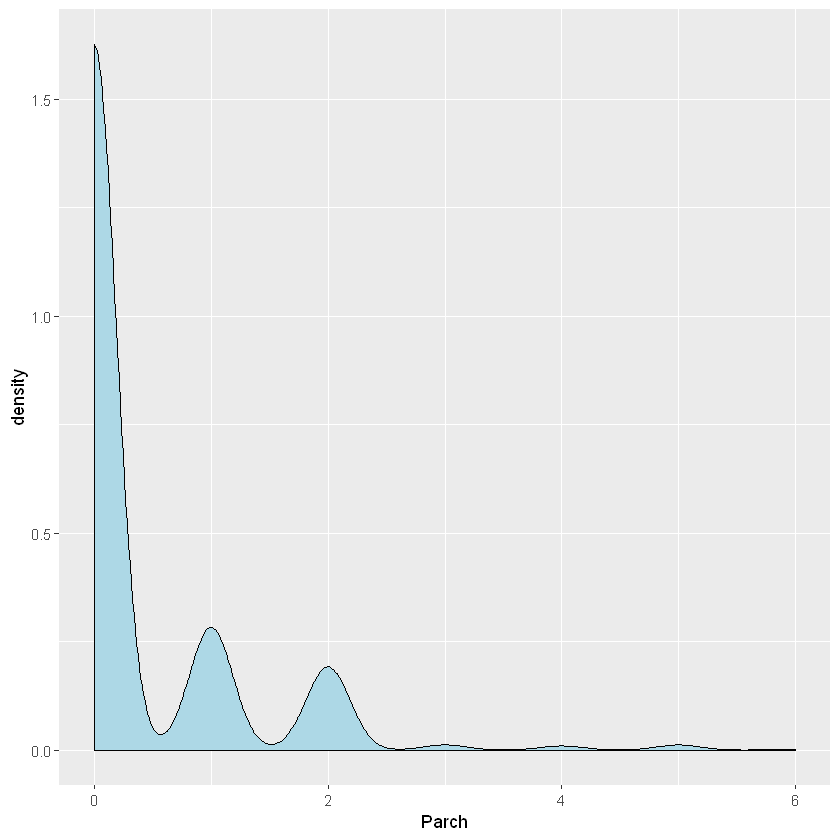

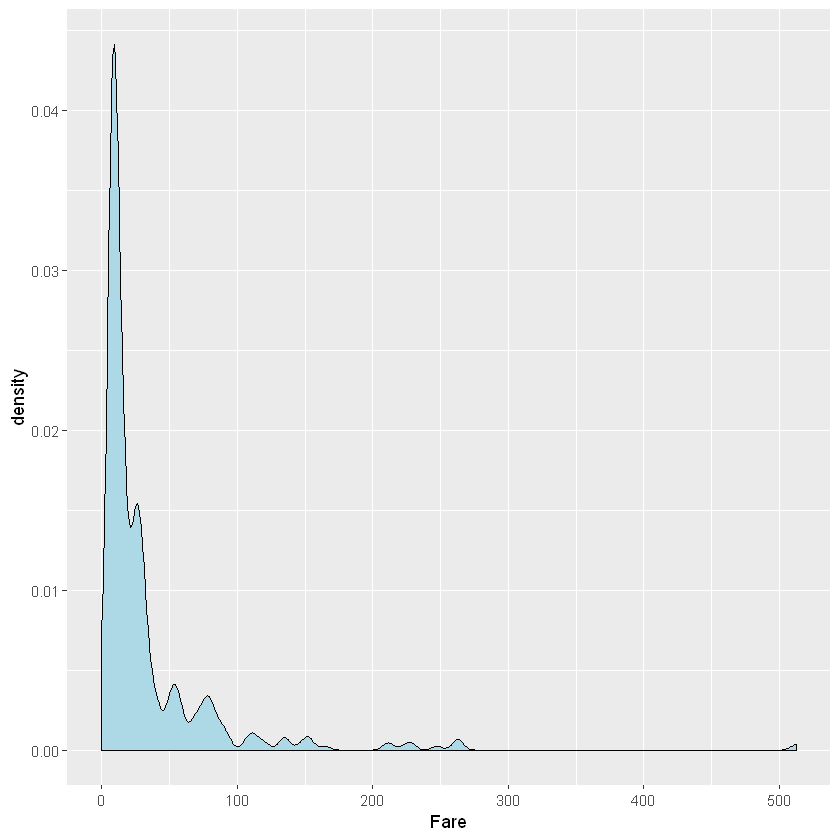

In [14]:
density_curves_all <- function(data)
{
  library(ggplot2)
  for (i in 1:ncol(data)){
      print(ggplot(data) +
              geom_density(mapping = aes(x=data[,i]), fill = "red") +
              xlab(i))
  }
}

density_curves(titanic)

### 13. Write a function that do visualization of a dataset, i.e. the function should output a set of several graphs of the variables

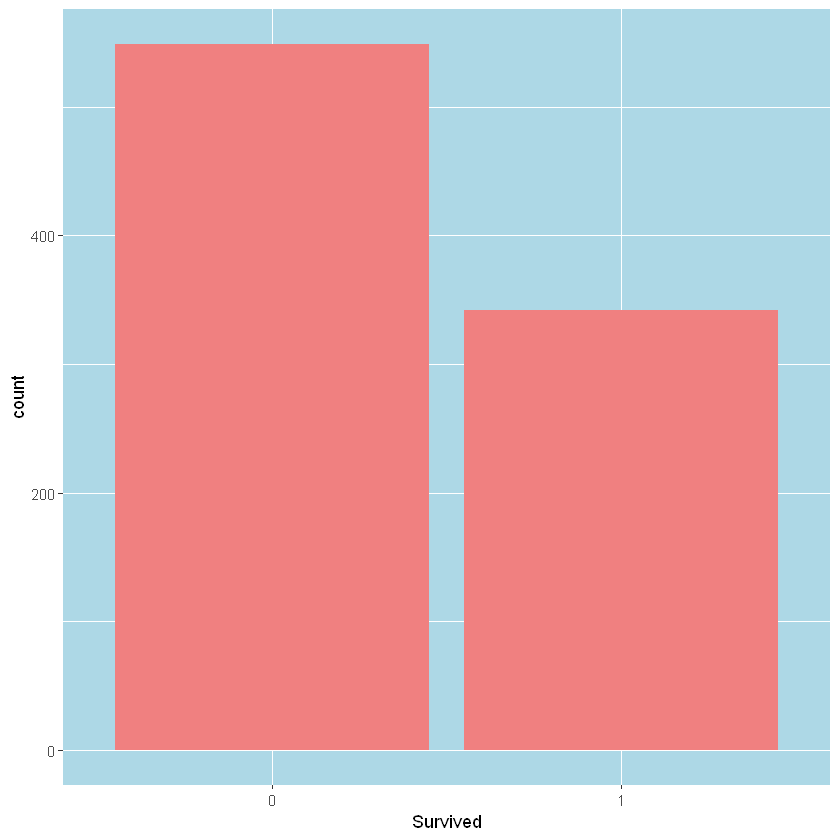

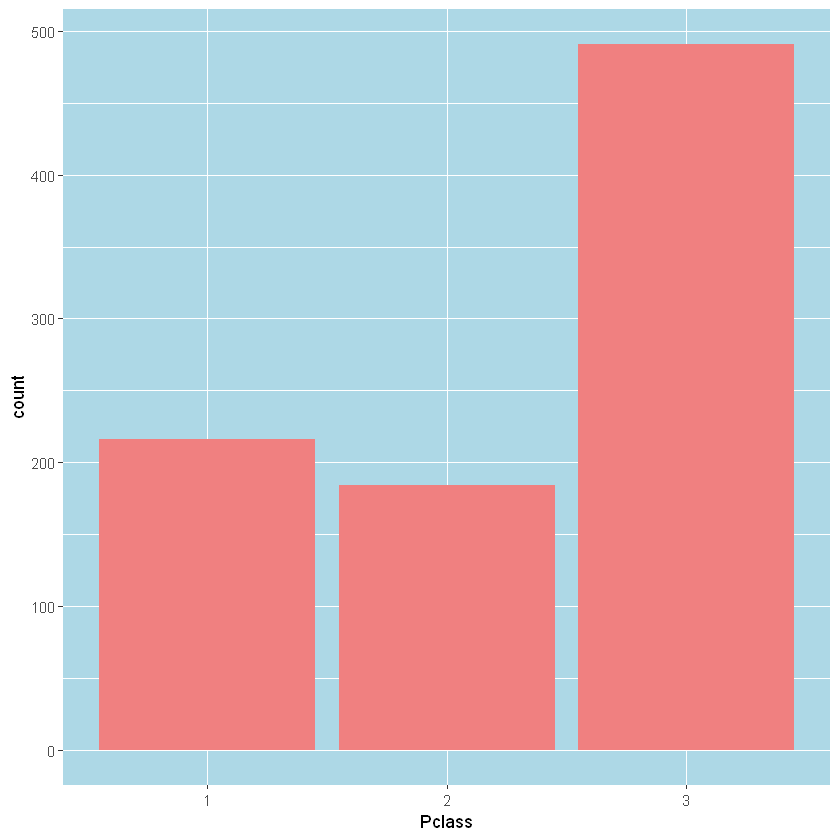

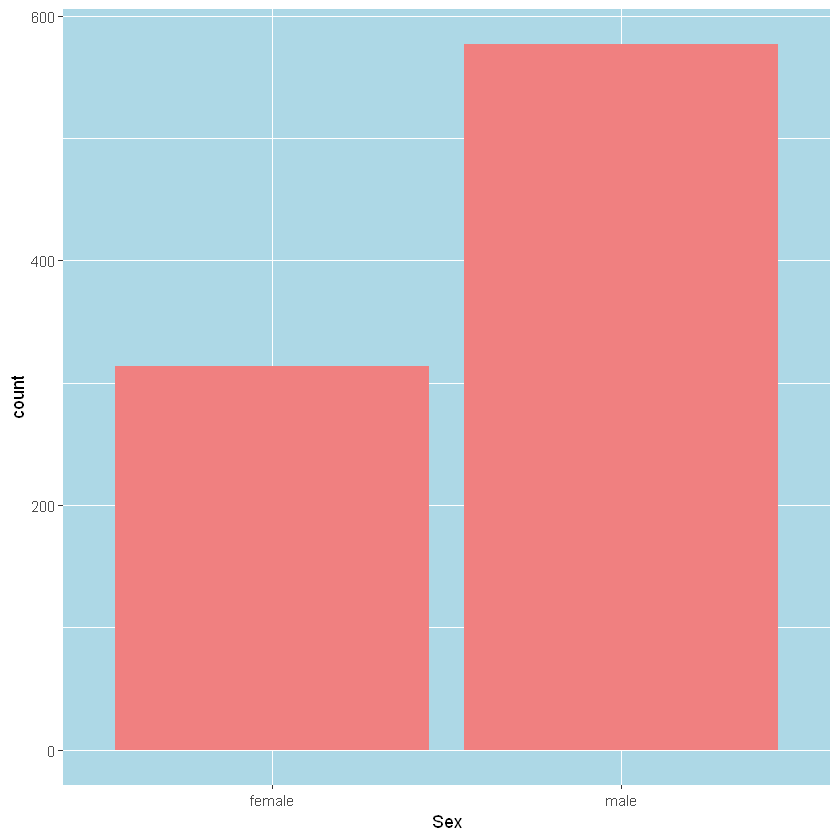

Warning message:
"Removed 177 rows containing non-finite values (stat_density)."

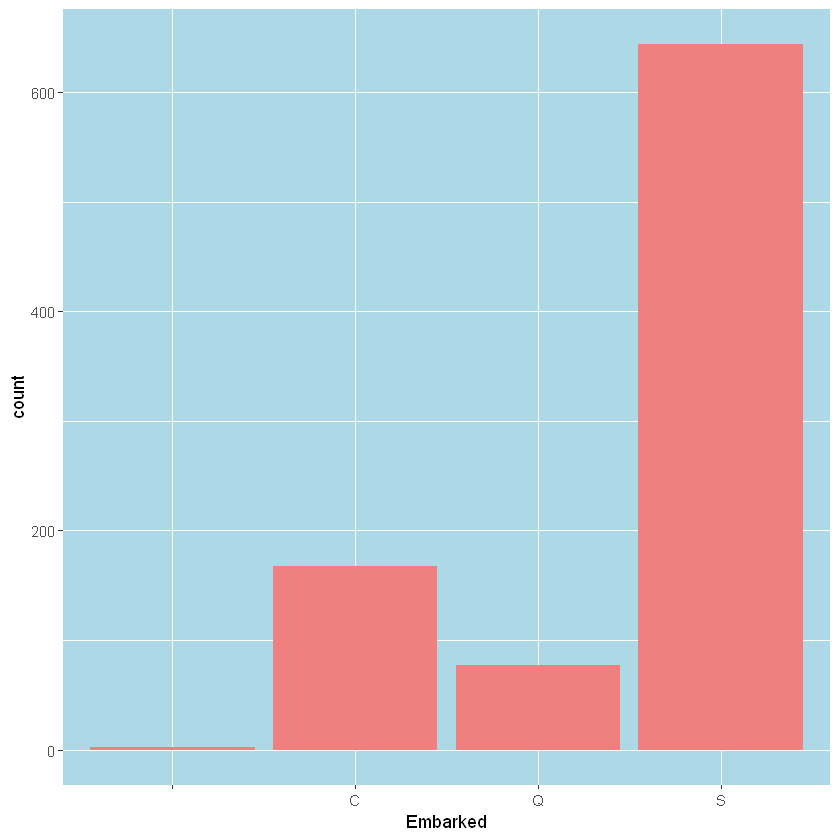

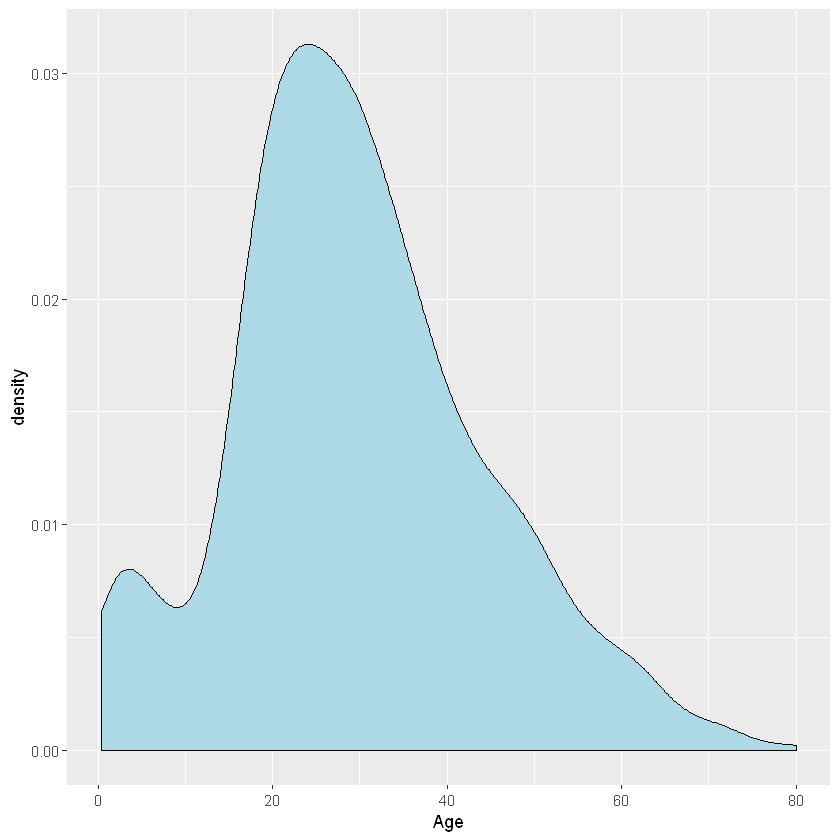

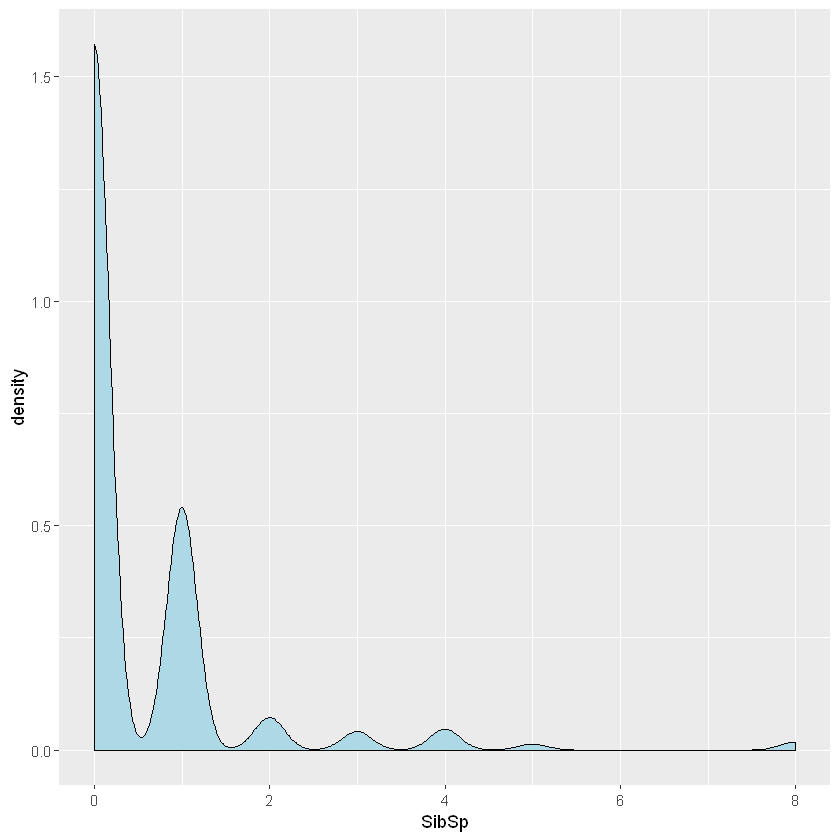

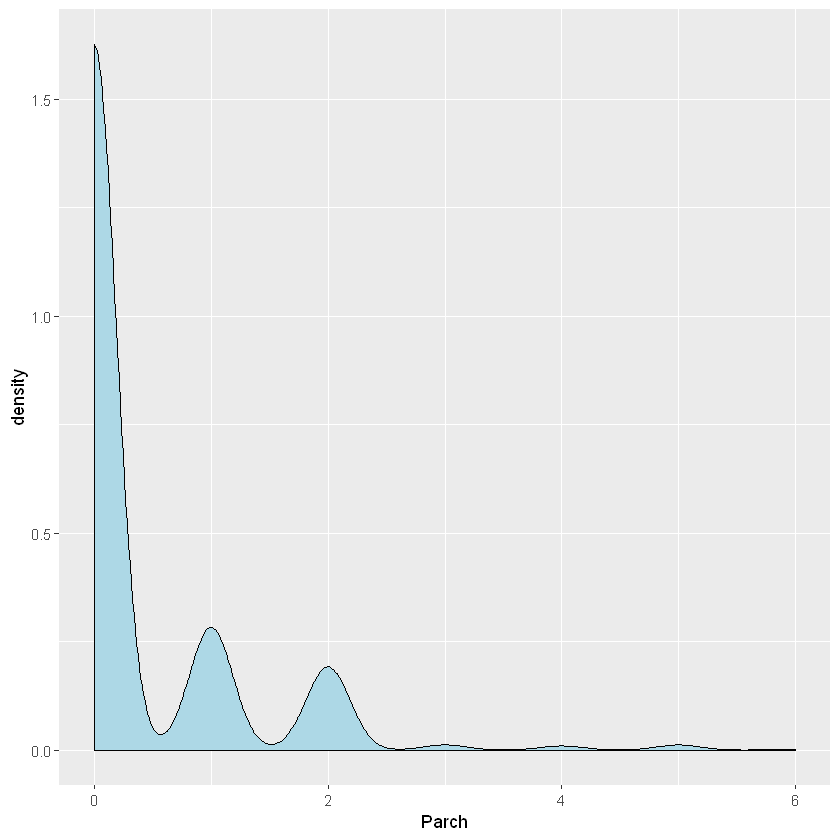

Warning message:
"Removed 177 rows containing non-finite values (stat_boxplot)."

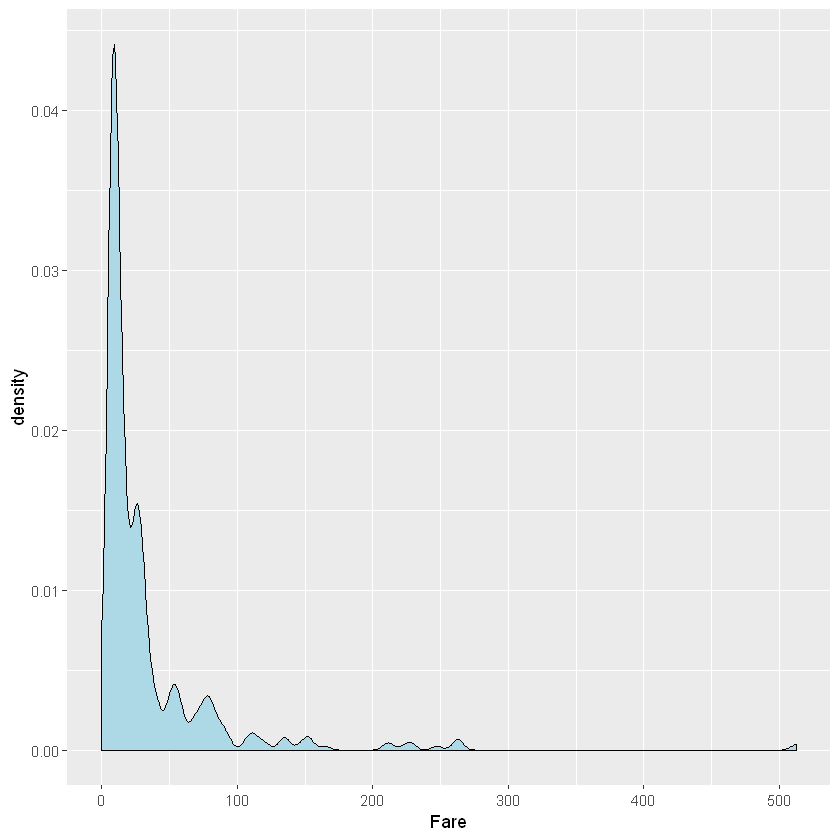

Warning message:
"Removed 177 rows containing non-finite values (stat_boxplot)."

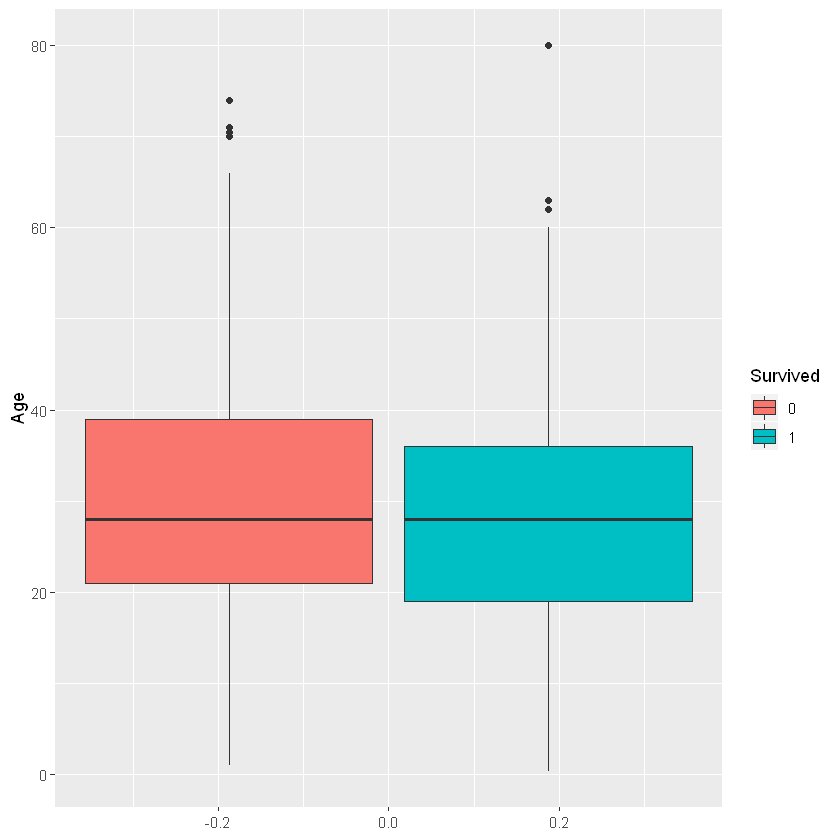

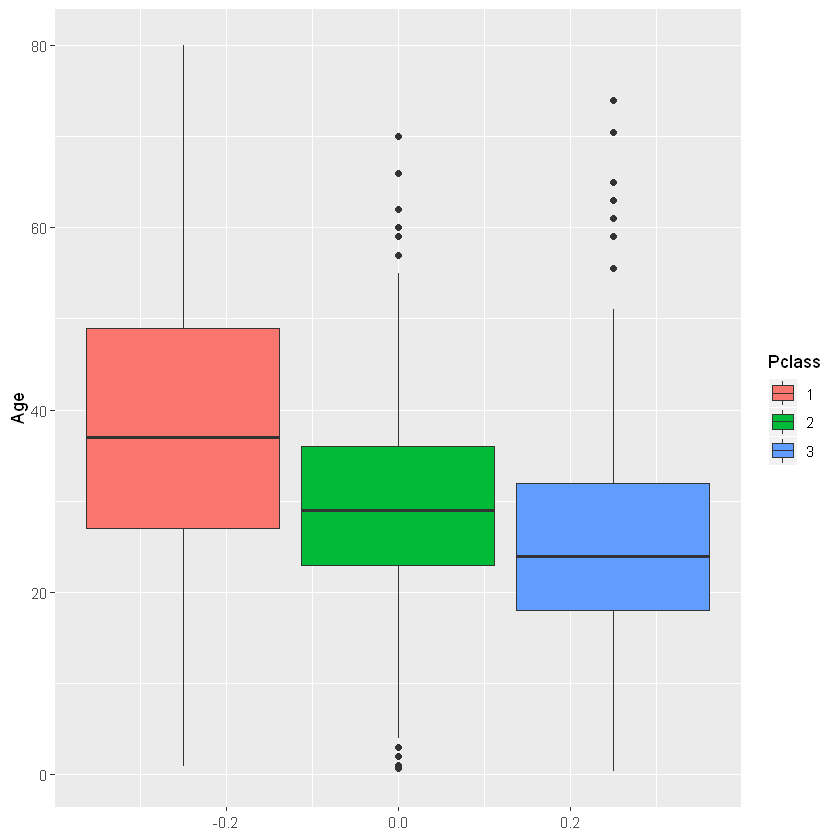

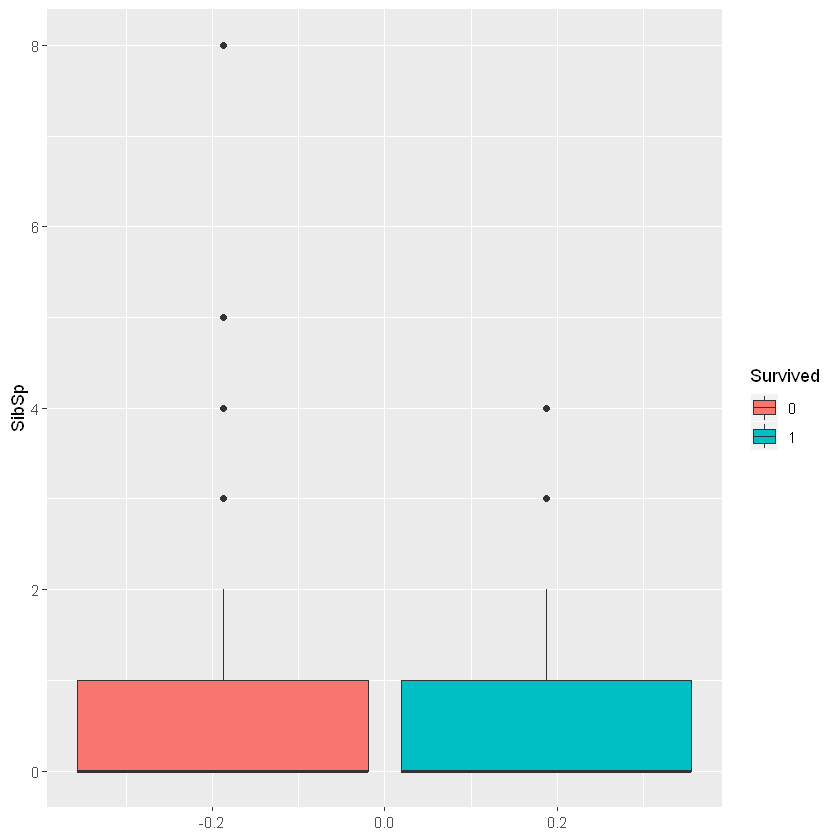

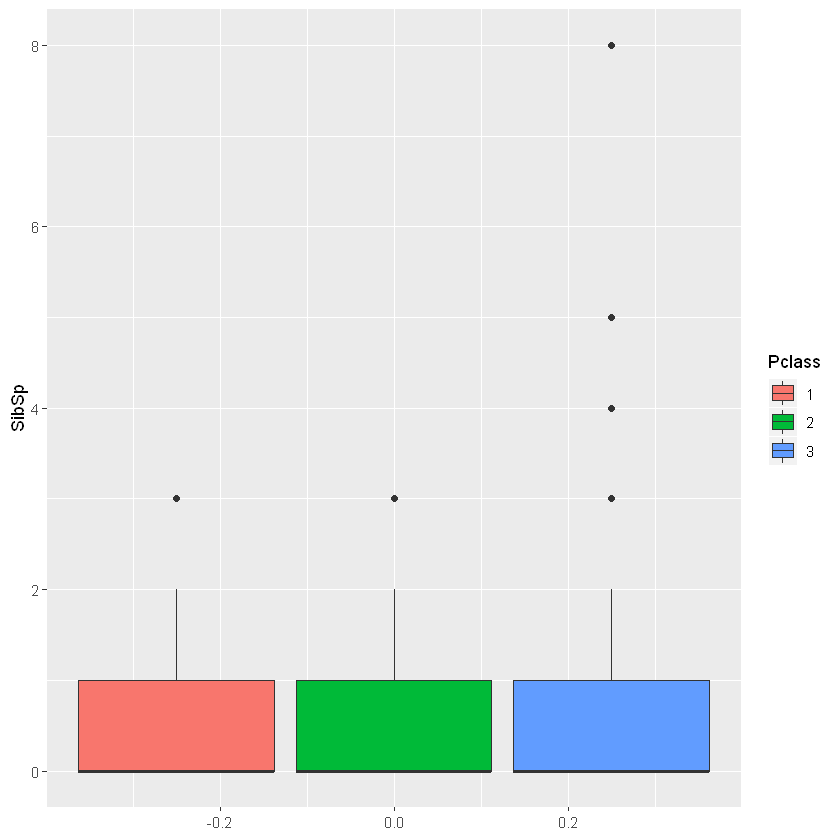

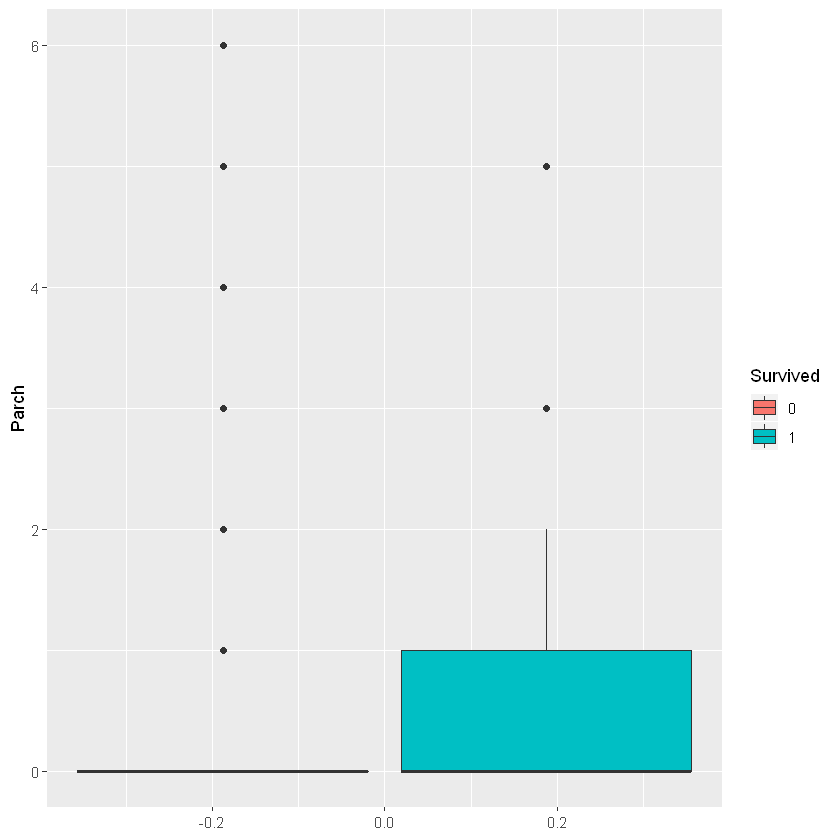

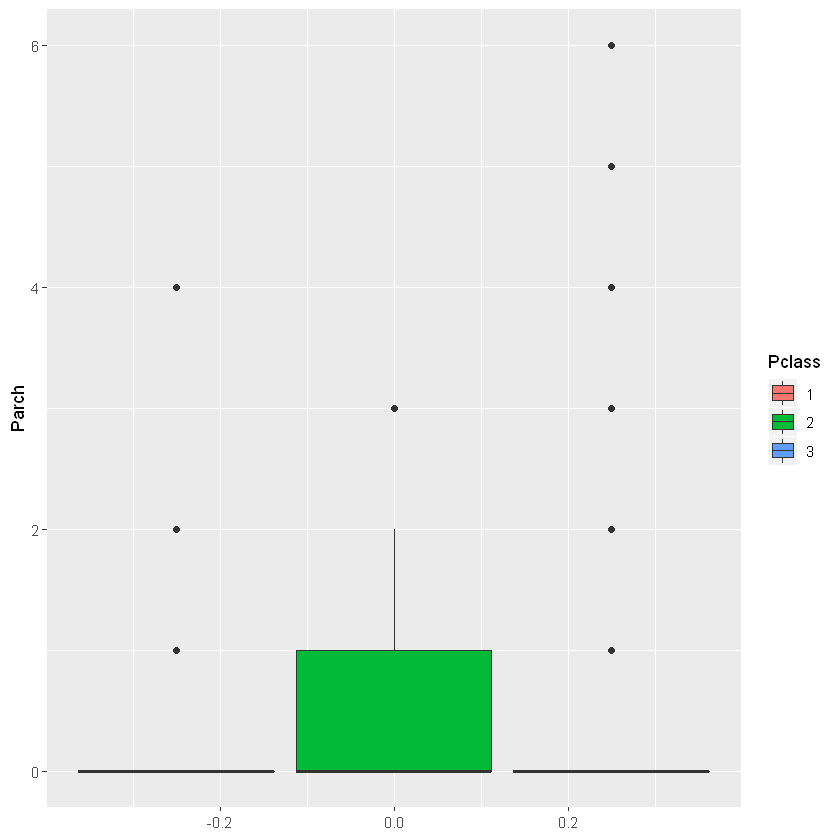

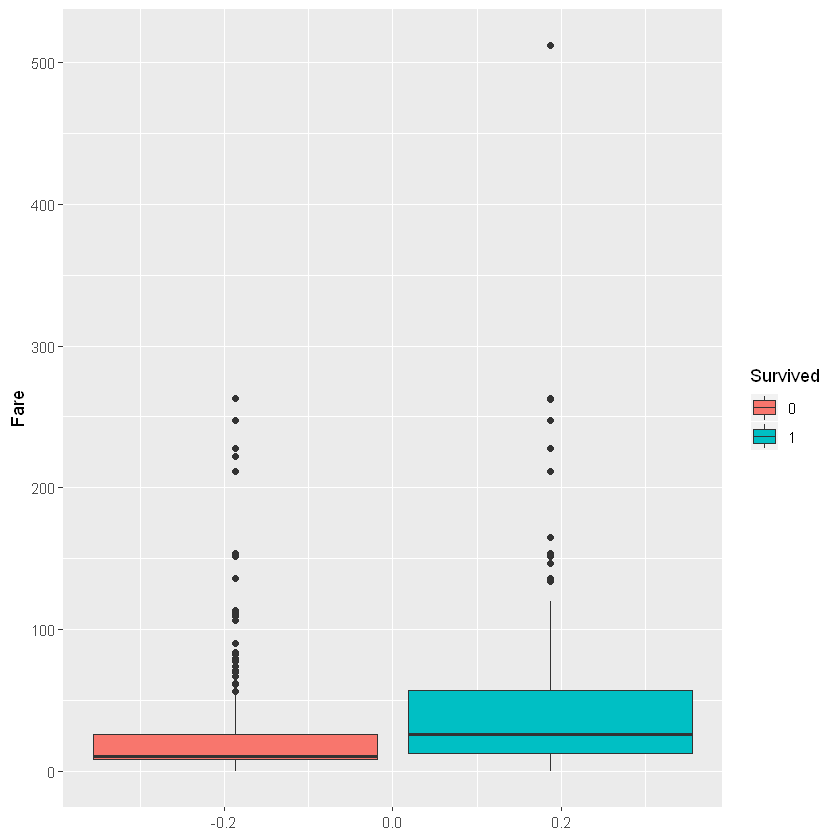

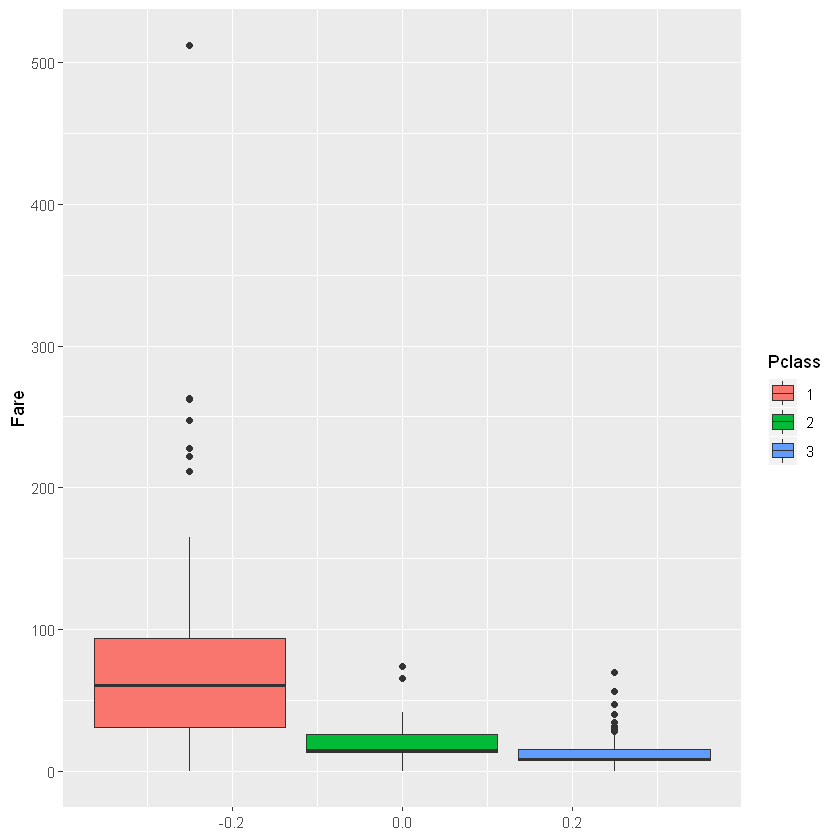

In [15]:
visualization <- function (data)
{
  library(ggplot2)
  
  bar_charts(data)
  density_curves(data)
  
  col <- names(data)
  for (i in 1:ncol(data)){
    if (is.numeric(data[[i]]))
      for (j in 1:2){
        if (is.factor(data[[j]])){
          print(ggplot(data) + 
            geom_boxplot(mapping = aes(y = data[,i], fill = data[,j])) +
            labs(fill = col[j]) +
            ylab(col[i]))
      }
    }
  }
}

visualization(titanic)